<a href="https://colab.research.google.com/github/syahrinalfi/MachineLearningTasks/blob/main/9thWeekTask/9_Regression_Case_NN_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Muhammad Alfi Syahrin
* NIM : 1103213144
* Lecture : 9
* Model : Neural Network
* Dataset : [House Price Data](https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/)


# Import Library

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
drive.mount('/content/drive')
url = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Minggu 10/housepricedata.csv"
df = pd.read_csv(url)

Mounted at /content/drive


In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# Preproccess Data

In [4]:
# Pemilihan Fitur dan Target yang akan digunakan
features = ['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea']
target = 'AboveMedianPrice'

In [5]:
# Menyimpan Fitur dan Target pada Variabel X dan y
X = df[features]
y = df[target]

In [6]:
# Normalisasi Data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [7]:
# Data Split untuk Train, Validation, dan Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

In [8]:
# Pembuatan model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
# Compile Model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Training model menggunakan data train
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
16/16 [==============================] - 4s 41ms/step - loss: 0.6945 - accuracy: 0.4892 - val_loss: 0.6951 - val_accuracy: 0.4873
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.6893 - accuracy: 0.4892 - val_loss: 0.6902 - val_accuracy: 0.4892
Epoch 3/100
16/16 [==============================] - 0s 19ms/step - loss: 0.6846 - accuracy: 0.5362 - val_loss: 0.6860 - val_accuracy: 0.5479
Epoch 4/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6807 - accuracy: 0.6223 - val_loss: 0.6824 - val_accuracy: 0.5871
Epoch 5/100
16/16 [==============================] - 0s 25ms/step - loss: 0.6772 - accuracy: 0.6673 - val_loss: 0.6794 - val_accuracy: 0.6438
Epoch 6/100
16/16 [==============================] - 0s 26ms/step - loss: 0.6741 - accuracy: 0.7123 - val_loss: 0.6765 - val_accuracy: 0.7084
Epoch 7/100
16/16 [==============================] - 0s 21ms/step - loss: 0.6713 - accuracy: 0.7632 - val_loss: 0.6737 - val_accuracy: 0.7260
Epoch 

Dapat dilihat bahwa model menghasilkan akurasi pada iterasi 100 dengan nilai 85% pada data train dan 86% pada data validation

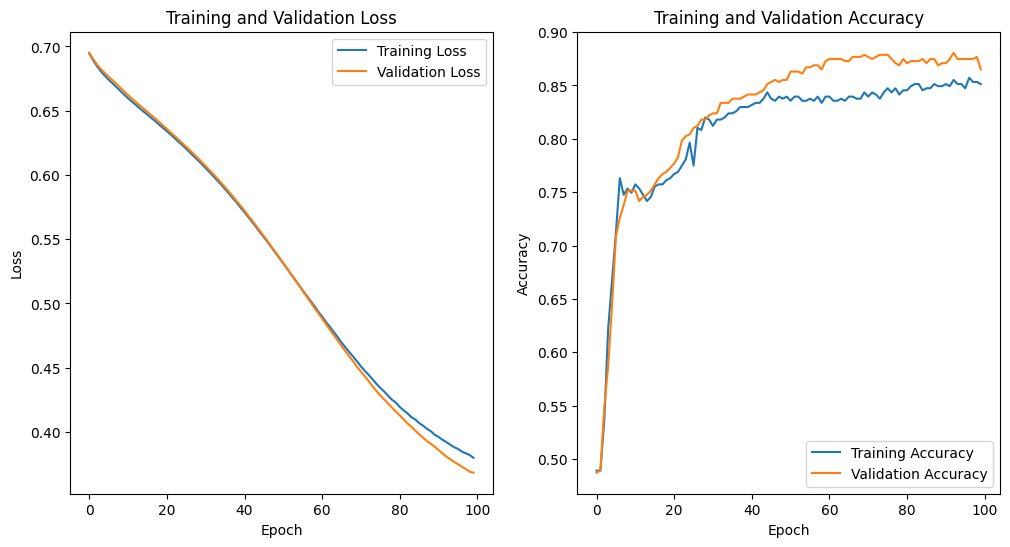

In [11]:
# Visualisasi Performa Model
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Dapat dilihat bahwa model memiliki loss yang berkurang setiap iterasi. Model juga memiliki akurasi yang meningkat tiap iterasi namun berhenti stabil di sekitar 85% untuk akurasi data validasi pada iterasi ke-50 dan seterusnya